# Analysis Of Starbucks'  Global Presence


*Importing packages*

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

* Reading the data into the dataframe
* Preprocessing the data and formatting it

In [2]:
# Data frame for the starbucks locations
starbucks = pd.read_csv('directory.csv')
starbucks['store_count']= np.ones(starbucks.shape[0])
starbucks =starbucks[['Country', 'store_count', 'Ownership_Type']]
starbucks=starbucks.groupby('Country').agg({'store_count':'sum'})
starbucks.reset_index(inplace=True)
starbucks.sample(5)


,Country,store_count
55,PL,53.0
56,PR,24.0
21,CY,10.0
58,QA,18.0
70,US,13608.0


In [3]:
#Read the country code file into the dateframe.
country_code = pd.read_csv('country_code.csv')
country_code.sample(2)

#Modify the name of some countries, removing 'the, republic of'
country_name = country_code['Country_Name'].tolist()

country_name = [country.split(',')[0] for country in country_name]

#Assign the modified values in the country_name column
country_code['Country_Name'] = country_name

country_change = {'United States of America':'United States', 'Russian Federation':'Russia', 'Korea':'South Korea',
                  'Czech Republic (Czechia)' :'Czech Republic'}

#Change united states of america to united states
country_code['Country_Name']= country_code['Country_Name'].apply(lambda x : country_change[x] if x in country_change else x)

country_code

,Continent_Name,Country_Name,Two_Letter_Country_Code
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica,AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS
...,...,...,...
256,Africa,Zambia,ZM
257,Oceania,Disputed Territory,XX
258,Asia,Iraq-Saudi Arabia Neutral Zone,XE
259,Asia,United Nations Neutral Zone,XD


In [4]:
#Merge starbucks data frame and country code
starbucks1 = pd.merge(starbucks, country_code, how='outer' ,left_on='Country', right_on='Two_Letter_Country_Code')
starbucks1.drop(['Country'], axis=1, inplace=True)
starbucks1.fillna(0, inplace=True)
starbucks1.sample(4)


,store_count,Continent_Name,Country_Name,Two_Letter_Country_Code
110,0.0,Africa,Mayotte,YT
196,0.0,Oceania,United States Minor Outlying Islands,UM
182,0.0,Africa,Namibia,0
212,0.0,North America,Anguilla,AI


In [5]:
#Dataframe for the world population
world_population = pd.read_csv('world_population.csv')
world_population = world_population[['country', 'population', 'density','land_area']]
world_population['population']= world_population['population'].str.replace(',', '').astype(float)
world_population['density']= world_population['density'].str.replace(',', '').astype(float)
world_population['land_area']= world_population['land_area'].str.replace(',', '').astype(float)

world_population.sample(5)

,country,population,density,land_area
113,Singapore,5850342.0,8358.0,700.0
49,Venezuela,28435940.0,32.0,882050.0
134,Bosnia and Herzegovina,3280819.0,64.0,51000.0
168,Luxembourg,625978.0,242.0,2590.0
38,Canada,37742154.0,4.0,9093510.0


In [28]:
#DataFrame for the gdp
gdp=pd.read_csv('gdp.csv')

#Merge gdp and world population data frame
gdp_pop = pd.merge(world_population, gdp, how='outer' ,on='country')
gdp_pop.sample(5)
gdp_pop['gdp_per_capita']= gdp_pop.gdp_ppp/gdp_pop.population
gdp_pop= gdp_pop[['country', 'population', 'gdp_per_capita', 'land_area', 'gdp_ppp']]
gdp_pop.sample(4)


,country,population,gdp_per_capita,land_area,gdp_ppp
203,Dominica,71986.0,12628.041715,750.0,9.090422e+08
23,Tanzania,59734218.0,2611.568465,885800.0,1.560000e+11
75,Rwanda,12952218.0,2260.262274,24670.0,2.927541e+10
197,Tonga,105695.0,NaN,720.0,NaN


In [29]:
#Merge starbucks data frame and the gdp_pop data frame
starbucks2 =pd.merge(starbucks1, gdp_pop, how='left', left_on='Country_Name', right_on='country')
starbucks2.sample(5)
starbucks2.dropna(axis=0, inplace=True)
starbucks2.drop('Country_Name',axis=1, inplace=True)
starbucks2.sample(4)

,store_count,Continent_Name,Two_Letter_Country_Code,country,population,gdp_per_capita,land_area,gdp_ppp
99,0.0,Africa,BI,Burundi,11890784.0,759.102958,25680.0,9.026329e+09
32,28.0,Europe,GR,Greece,10423054.0,32236.233258,128900.0,3.360000e+11
154,0.0,Asia,IQ,Iraq,40222493.0,11063.461432,434320.0,4.450000e+11
31,901.0,Europe,GB,United Kingdom,67886011.0,48021.675629,241930.0,3.260000e+12


In [30]:
#Dataframe for the ease of business
business= pd.read_csv('business_ease.csv')
business= business[['Country Name', 'bus_perf']]

#Merge business data frame with starbucks dataframe
starbucks3= pd.merge(starbucks2, business, how='left', left_on='country', right_on='Country Name')
starbucks3.drop('Country Name', axis=1, inplace=True)
starbucks3.sample(3)


,store_count,Continent_Name,Two_Letter_Country_Code,country,population,gdp_per_capita,land_area,gdp_ppp,bus_perf
147,0.0,Africa,RW,Rwanda,12952218.0,2260.262274,24670.0,2.927541e+10,76.48282
105,0.0,Asia,GE,Georgia,3989167.0,14582.982651,69490.0,5.817395e+10,83.73393
37,106.0,Asia,KW,Kuwait,4270571.0,51047.037972,17820.0,2.180000e+11,67.40473


In [50]:
#Dataframe for the coffee consumption
coffee= pd.read_csv('coffee.csv')
coffee=coffee[['country', 'coffee_consumption']]
coffee.dropna(axis=0, inplace=True)


#Merge the coffee data frame with starbucks
starbucks4= pd.merge(starbucks3, coffee, how='left', on='country')
starbucks4.rename(columns={'Continent_Name':'continent', 'Two_Letter_Country_Code':"code"}, inplace=True)
starbucks4.sample(5)


#Create a new column store per 10kcapita
starbucks4['store_per_10k'] = starbucks4['store_count'] *1e5 /starbucks4['population']

starbucks4['people_store'] = starbucks4['population']/ starbucks4['store_count']

starbucks4.sample(5)

,store_count,continent,code,country,population,gdp_per_capita,land_area,gdp_ppp,bus_perf,coffee_consumption,store_per_10k,people_store
63,289.0,Asia,TH,Thailand,69799978.0,19197.713787,510890.0,1.340000e+12,80.09233,1052.0,0.414040,2.415224e+05
121,0.0,Europe,LV,Latvia,1886198.0,32658.465708,62200.0,6.160033e+10,80.28054,101.0,0.000000,inf
22,31.0,Africa,EG,Egypt,102334404.0,12019.418220,995450.0,1.230000e+12,NaN,67.0,0.030293,3.301110e+06
9,4.0,South America,BO,Bolivia,11673021.0,8995.100754,1083300.0,1.050000e+11,51.65574,60.0,0.034267,2.918255e+06
122,0.0,Africa,LR,Liberia,5057681.0,1451.623767,96320.0,7.341850e+09,43.22747,5.0,0.000000,inf


In [51]:
def condition(x):
    """
    This function rename continents into regions
    x :  is a string value from a data frame column
    returns a string
    """
    
    if (x=='Europe' or x=='Africa'):
        return f'Europe_Africa'
    elif (x =='Asia' or x =='Oceania'):
        return f'Asia_Oceania'
    else :
        return f'Americas'
    

#Create a new column 'region'  
starbucks4['region']= starbucks4['continent'].apply(lambda x : condition(x))

#Mutate a new column store presence. 
starbucks4['store_presence'] = starbucks4['store_count'].apply(lambda x : 'yes' if x >0  else 'no')

starbucks4.sample(4)



,store_count,continent,code,country,population,gdp_per_capita,land_area,gdp_ppp,bus_perf,coffee_consumption,store_per_10k,people_store,region,store_presence
39,8.0,Asia,KZ,Kazakhstan,18776707.0,27054.797202,2699700.0,5.080000e+11,79.55915,251.0,0.042606,2347088.375,Asia_Oceania,yes
74,0.0,North America,AG,Antigua and Barbuda,97929.0,22627.497524,440.0,2.215888e+09,60.28342,1.0,0.000000,inf,Americas,no
86,0.0,Africa,CM,Cameroon,26545863.0,3708.133547,472710.0,9.843561e+10,46.09974,69.0,0.000000,inf,Europe_Africa,no
98,0.0,Africa,GQ,Equatorial Guinea,1402985.0,18679.692926,28050.0,2.620733e+10,41.05286,2.0,0.000000,inf,Europe_Africa,no


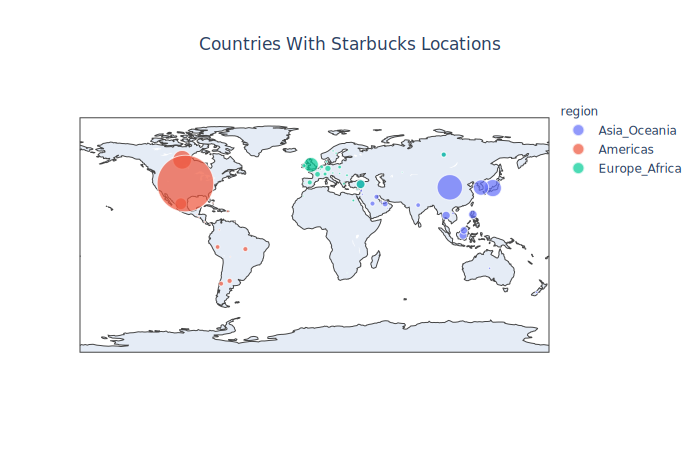

In [52]:
# Graphing Starbucks presence store per country
fig = px.scatter_geo(starbucks4, locations="country",
                     locationmode='country names',
                     size="store_count",
                     color= 'region',
                     size_max= 40,
                    title='Countries With Starbucks Locations')

fig.update(layout=dict(title=dict(x=0.5)))
fig.show('svg')

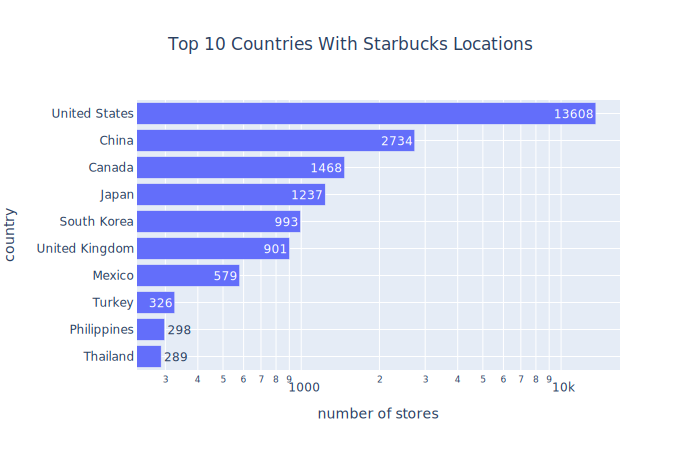

In [53]:
#Make a new data frame for the bar graph
star_bar = starbucks5[['country',  'store_count']]
star_bar = star_bar.sort_values(by='store_count').tail(10)

#Display the top 15 countries with starbucks locations
fig = px.bar(star_bar, y='country' , x='store_count', 
             orientation='h', log_x=True,
            title="Top 10 Countries With Starbucks Locations",
            labels= {'store_count': 'number of stores'},
            text='store_count')

fig.update(layout=dict(title=dict(x=0.5)))

fig.show('svg')


In [14]:
starbucks_10k = pd.read_csv('starbucks_10k.csv')
starbucks_10k = pd.DataFrame(starbucks_10k)

#Display the number of stores open per year by region
fig = px.line(starbucks_10k, x="year", y="num_stores",
              title='Stores Open Per Year',
             color= 'region',
             labels={'num_stores':'number of stores'},
              line_shape='spline'
             )

fig.update(layout=dict(title=dict(x=0.5)))

fig.show('svg')
    

In [54]:
def condition2(x):
    """
    This function rename continents into regions
    x :  is a string value from a data frame column
    returns a string
    """
    
    if (x=='Europe' or x=='Africa'):
        return f'Europe_Africa'
    elif (x =='Asia' or x =='Oceania'):
        return f'Asia_Oceania'
    else :
        return f'Americas'

In [58]:

#Creating a new data frame for the type of ownershp
star_own = pd.read_csv('directory.csv')
star_own['store_count']= np.ones(star_own.shape[0])
star_own =star_own[['Country', 'store_count', 'Ownership_Type']]
star_own =star_own.groupby(['Country', 'Ownership_Type']).agg({'store_count':'sum'})
star_own.reset_index(inplace=True)
star_own.sample(3)
country_code = country_code[['Continent_Name', 'Two_Letter_Country_Code']]
star_own2 = pd.merge(star_own, country_code, left_on='Country', right_on='Two_Letter_Country_Code')

star_own2['region']= star_own2['Continent_Name'].apply(lambda x : condition(x))

star_own2 = star_own2.loc[star_own2.region !='Europe_Africa']

star_own2.sample(3)



,Country,Ownership_Type,store_count,Continent_Name,Two_Letter_Country_Code,region
64,MY,Licensed,228.0,Asia,MY,Asia_Oceania
69,OM,Licensed,12.0,Asia,OM,Asia_Oceania
91,TT,Licensed,3.0,North America,TT,Americas


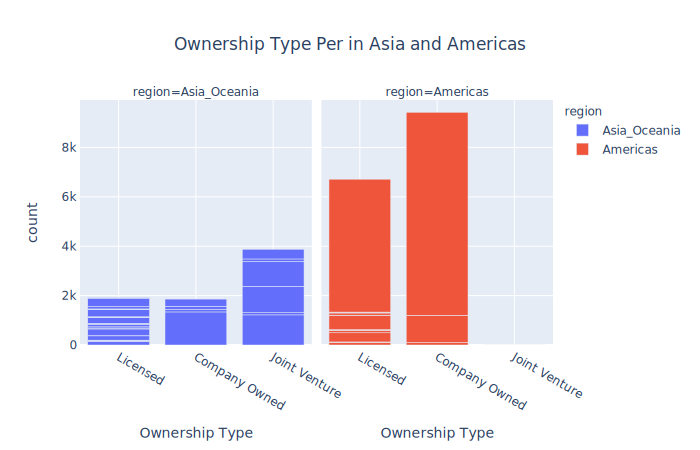

In [60]:
fig = px.bar(star_own2, x= 'Ownership_Type',y='store_count',
            facet_col='region',
            labels={'store_count':'count', 'Ownership_Type': 'Ownership Type'},
            title='Ownership Type Per in Asia and Americas',
            color='region'
          
           )


fig.update(layout=dict(title=dict(x=0.5)))

fig.show('svg')

## Research Question 2
### What these countries tell us about how strabucks choose a location to operate?


Gross Domestic Product(GDP) using Purchaisng Power Parity(PPP)

Accroding to wikipidea:

GDP comparisons using PPP are arguably more useful than those using nominal GDP when assessing a nation's domestic market because PPP takes into account the relative cost of local goods, services and inflation rates of the country, rather than using international market exchange rates, which may distort the real differences in per capita income.


Population- data from worldometer

Coffee consumption - data from International Coffee Organization

According to world bank:

Doing Business 2020, a World Bank Group flagship publication, is the 17th in a series of annual studies measuring the regulations that enhance business activity and those that constrain it. Doing Business presents quantitative indicators on business regulations and the protection of property rights that can be compared across 190 economies—from Afghanistan to Zimbabwe—and over time.

Doing Business covers 12 areas of business regulation. Ten of these areas—starting a business, dealing with construction permits, getting electricity, registering property, getting credit, protecting minority investors, paying taxes, trading across borders, enforcing contracts, and resolving insolvency—are included in the ease of doing business score and ease of doing business ranking. Doing Business also measures regulation on employing workers and contracting with the government, which are not included in the ease of doing business score and ranking.

* Results and observations


Countries with  Starbucks stores  has a median GDP per capita of 30000, a median of 17 million people, a median score of 75 on ease of doing business and a median of 610 kg of coffee consumption.


In [ ]:

gdp_df = starbucks4[['store_presence', 'gdp_per_capita', 'country']]

#Display the box plot with gdp per capita and store presence
fig = px.box(gdp_df, x='store_presence', y='gdp_per_capita', color='store_presence',
             points=False, log_y=True, title = "Gross Domestic Product Per Capita",
            labels={'gdp_per_capita': 'GDP per capita', 'store_presence':'store presence'})
             
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()


In [ ]:
pop_df = starbucks4[['store_presence', 'population','region']].dropna()

#Display the box plot for population and store presence
fig = px.box(pop_df , x='store_presence', y='population', color='store_presence',
             points=False,log_y=True, title = "Population",
            labels={ 'store_presence':'store presence'})
fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

In [ ]:
business_df = starbucks4[['store_presence', 'bus_perf','region']]

#Display the box plot for ease of business score and store presence
fig = px.box(business_df , x='store_presence', y='bus_perf', color='store_presence',
             points=False,log_y=True, title = "Ease Of Doing Business Score",
            labels={'bus_perf': 'Ease of Doing Business Score', 'store_presence':'store presence'})


fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

In [ ]:
coffee_df = starbucks4[['store_presence', 'coffee_consumption','region']]

#Display the box plot for coffee consumption and store presence
fig = px.box(coffee_df , x='store_presence', y='coffee_consumption', color='store_presence',
             points=False,log_y=True, title = "Coffee Consumption And Store Presence",
            labels={'coffee_consumption': 'Coffee Consumption', 'store_presence':'store presence'})

fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

In [ ]:
fig = px.choropleth(starbucks4, locations="country",
                    locationmode='country names',
                    color="store_per_10k", 
                    hover_name="country", 
                    title= 'Stores Per 10K Capita ',
                    color_continuous_scale=px.colors.sequential.OrRd)
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

In [ ]:
store_capita.sample(5)

In [ ]:
starbucks4.sample(4)

In [ ]:
store_capita= starbucks4.loc[(starbucks4.country !='United States') & 
                             (starbucks4.country !='Canada') &
                            (starbucks4.store_count >0) &
                            ((starbucks4.gdp_per_capita>3e4) | (starbucks4.population >16e6)),]



fig = px.scatter(store_capita, x='population', y='gdp_per_capita', 
                 size='people_store', hover_name='country',
                facet_col ='region', log_y=True, log_x=True, color = 'region',
                size_max=40)
fig.show()

## Research Question 3

### What country currently without Starbucks could be a potential for a new location?

* Conclusion:

Italy and Israel aare potential countries to open a new Starbucks locations beause of similar GDP per capita, population, coffe consumption and ease of doing business score to countries that currentaly have Starbucks stores.

In [49]:
# Create a new datafarme that has countries with no Starbucks stores and higher gdp
expand_df=starbucks4


#Display the graph
fig = px.scatter(expand_df, x='gdp_ppp', y='population', color='country' 
                 , size_max=20, log_y=True, log_x=True, title='fig.3 Potential Countries For A New Location')

fig.update(layout=dict(title=dict(x=0.5)))
fig.show()


In [ ]:
corr_df =starbucks4[['store_count','population', 'bus_perf', 'coffee_consumption', 'country']]
corr_df.corr(method='pearson')

In [46]:
# Create a new datafarme that has countries with no Starbucks stores and higher gdp
open_df=starbucks4.loc[starbucks4.store_count==0].dropna()

#Display the graph
fig = px.scatter(open_df, x='gdp_per_capita', y='population', color='country' 
                 , size_max=60, log_y=True, log_x=True, size= 'coffee_consumption', title='fig.3 Potential Countries For A New Location')

fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

                        